<a href="https://colab.research.google.com/github/yfhkucing/experiment_bms/blob/master/model_temp_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [4]:
feature = pd.read_excel('/content/Koordinat dan Input Skenario.xlsx',sheet_name='InputSkenario')
label = pd.read_excel('/content/data_big_4.xlsx',sheet_name='Sheet2')
feature.pop('Jam')
feature.pop('Fan')


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
187    1.0
188    1.0
189    1.0
190    1.0
191    1.0
Name: Fan, Length: 192, dtype: float64

In [24]:
feature

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan/i1,Fan/i2,Fan/i3,Fan/i4,Fan/i5,Fan/i6,Fan/o1,Fan/o2,Fan/o3,Fan/o4,Fan/o5,Fan/o6
0,0,0,171,0.5,27.0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,153,0.4,31.5,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,47,4.8,33.1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,62,4.1,27.4,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,341,3.8,30.6,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,1,163,0.9,31.4,1,1,1,1,1,1,1,1,1,1,1,1
188,1,1,210,0.1,31.3,1,1,1,1,1,1,1,1,1,1,1,1
189,1,1,247,0.3,26.7,1,1,1,1,1,1,1,1,1,1,1,1
190,1,1,265,1.0,28.1,1,1,1,1,1,1,1,1,1,1,1,1


In [5]:
label

,koor_x,koor_y,Vx,Vy,Temp
0,1,30,0.002399,-0.073255,27.417225
1,1,63,0.002269,-0.075449,27.366829
2,1,94,0.002446,-0.076216,27.273479
3,1,113,0.002551,-0.073114,27.065680
4,1,145,0.002307,-0.072831,26.763813
...,...,...,...,...,...
5755,104,68,0.032203,0.101951,26.107449
5756,104,102,0.095899,0.079573,25.759459
5757,104,125,0.055757,0.087645,25.356976
5758,104,161,0.044939,0.072076,24.928185


In [7]:
array_y = []
for i in range(30):
  frame= label[i::30]
  frame = frame.drop(['koor_x','koor_y',],axis=1)
  frame = frame.drop(['Vx','Vy'],axis=1)
  array_y.append(frame)

In [11]:
! mkdir models
y_testing = []

import joblib
from sklearn.linear_model import LinearRegression

#model
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LogisticRegression, Ridge, ElasticNet,LassoLars
from sklearn.ensemble import RandomForestRegressor

#preprocessing and metric
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

for i in range(30):
  x = np.array(feature)
  y = np.array(array_y[i])
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.15, random_state= 10)
  y_testing.append(y_test)
  #fitting
  regressor = LassoLars(alpha=0.1, normalize=False)
  regressor.fit(x_train,y_train)
  joblib.dump(regressor,f'/content/models/model {i}',)

In [13]:
skor_r2=[]
mae_=[]
rmse = []
y_predict = []
for i in range(30):
  model = joblib.load(f'/content/models/model {i}')
  y_pred = model.predict(x_test)
  Skor_r2 = r2(y_test,y_pred)
  RMSE = mse(y_test,y_pred,squared=False)
  MAE = mae(y_test,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [14]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y_testing = np.array(y_testing)

In [15]:
skor_r2.shape, rmse.shape, y_predict.shape, y_testing.shape

((30,), (30,), (30, 29), (30, 29, 1))

In [17]:
r2_matrix = skor_r2.reshape(5,6)
rmse_matrix = rmse.reshape(5,6)
mae_matrix = mae_.reshape(5,6)

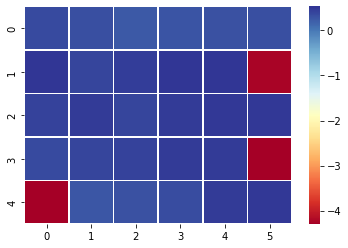

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

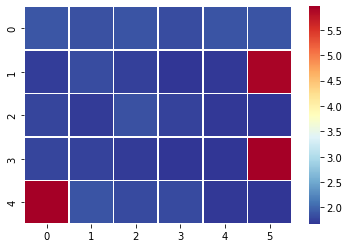

In [19]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [21]:
scenarios = 2  #0-28
indexing = 0    #0-3 (Vx,Vy,Vz,temp)

In [23]:
a = y_testing[(...,scenarios,indexing)]
b = y_predict[...,scenarios]
a = np.array(a)
b = np.array(b)
a = a.reshape(5,6)
b = b.reshape(5,6)
print('reshaped')

reshaped


In [26]:
!zip -r /content/models_temp_30.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/model 18 (deflated 54%)
  adding: content/models/model 7 (deflated 54%)
  adding: content/models/model 27 (deflated 54%)
  adding: content/models/model 25 (deflated 54%)
  adding: content/models/model 10 (deflated 54%)
  adding: content/models/model 24 (deflated 54%)
  adding: content/models/model 16 (deflated 54%)
  adding: content/models/model 23 (deflated 54%)
  adding: content/models/model 1 (deflated 54%)
  adding: content/models/model 3 (deflated 53%)
  adding: content/models/model 0 (deflated 54%)
  adding: content/models/model 20 (deflated 54%)
  adding: content/models/model 29 (deflated 54%)
  adding: content/models/model 17 (deflated 54%)
  adding: content/models/model 2 (deflated 54%)
  adding: content/models/model 14 (deflated 54%)
  adding: content/models/model 6 (deflated 54%)
  adding: content/models/model 28 (deflated 55%)
  adding: content/models/model 22 (deflated 54%)
  adding: content/models/model 8 (def